In [1]:
import os
import sys
import re
import pdb
import time

import numpy as np
import scipy as sp
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

print('pwd', os.getcwd())
print('np ', np.__version__)
print('sp ', sp.__version__)
print('tf ', tf.__version__)

pwd /home/marko/Projects/DU/DU1
np  1.11.1
sp  0.18.1
tf  0.10.0


In [2]:
import data
import fcann2

In [3]:
import time

class Timer(object):
    def __init__(self, label='', verbose=False):
        self.verbose = verbose
        self.label = label

    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        self.duration = self.end - self.start
        if self.verbose:
            print('%s: elapsed time: %f s' % (self.label, self.duration))

## Demo data module

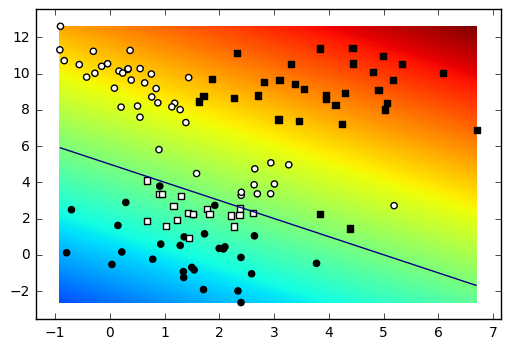

In [4]:
def myDummyDecision(X):
    scores = X[:,0] + X[:,1] - 5
    return scores

np.random.seed(42)

X,Y_ = data.sample_gmm_2d(K=4, C=2, N=30)
Y = myDummyDecision(X)>0

bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(myDummyDecision, bbox, offset=0)
data.graph_data(X, Y_, Y)
plt.show()

## Demo fcann2

iteration 0: loss 412.7671230896055
iteration 1000: loss 60.539765947802245
iteration 2000: loss 37.633989978993014
iteration 3000: loss 24.309120586407264
iteration 4000: loss 15.758926433648131
iteration 5000: loss 14.716066398242262
iteration 6000: loss 13.473415947014406
iteration 7000: loss 12.831386121250754
iteration 8000: loss 12.148217059900965
iteration 9000: loss 11.610160676695932


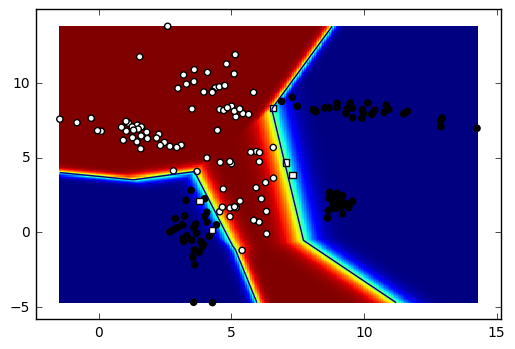

0.972222222222 0.944444444444 1.0
0.998937307426


In [5]:
np.random.seed(100)

X,Y_ = data.sample_gmm_2d(K=6, C=2, N=30)
nn = fcann2.fcann2(H=5)
nn.fcann2_train(X, Y_, 10000, 0.1, True, 1000)

dec_fun = lambda X: nn.fcann2_classify(X)[:, 1] 
probs = dec_fun(X)

Y = probs > 0.5
bbox=(np.min(X, axis=0), np.max(X, axis=0))


data.graph_surface(dec_fun, bbox, offset=0.5)
data.graph_data(X, Y_, Y)
plt.show()


# report performance
accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
AP = data.eval_AP(Y_[probs.argsort()])
print (accuracy, recall, precision)
print(AP)

iteration 0: loss 518.4255281040483
iteration 1000: loss 15.975982414639848
iteration 2000: loss 13.788901066791741
iteration 3000: loss 13.359642089111215
iteration 4000: loss 14.280796039693149
iteration 5000: loss 13.405846232192376
iteration 6000: loss 13.081598016825733
iteration 7000: loss 12.871335666816279
iteration 8000: loss 12.62735534413287
iteration 9000: loss 11.12408486253192


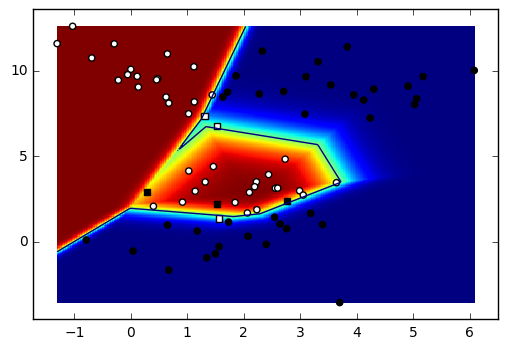

In [6]:
np.random.seed(42)

X,Y_ = data.sample_gmm_2d(K=4, C=2, N=20)
nn = fcann2.fcann2(H=5)
nn.fcann2_train(X, Y_, 10000, 0.1, True, 1000)
dec_fun = lambda X: nn.fcann2_classify(X)[:, 1] 
Y = dec_fun(X) > 0.5

bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(dec_fun, bbox, offset=0.5)
data.graph_data(X, Y_, Y)
plt.show()



## Demo tf lin reg

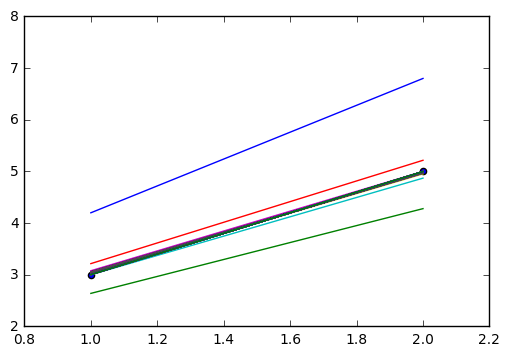

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


X  = tf.placeholder(tf.float32, [None])
Y_ = tf.placeholder(tf.float32, [None])
a = tf.Variable(0.0)
b = tf.Variable(0.0)

# afini regresijski model
Y = a * X + b

# kvadratni gubitak
loss = (Y-Y_)**2

# optimizacijski postupak: gradijentni spust
trainer = tf.train.GradientDescentOptimizer(0.1)
train_op = trainer.minimize(loss)
# same as
grads_and_vars = trainer.compute_gradients(loss, [a, b])
optimize = trainer.apply_gradients(grads_and_vars)

## 2. inicijalizacija parametara
sess = tf.Session()
sess.run(tf.initialize_all_variables())

## 3. učenje
X_data = np.array([1,2])
Y_data = np.array([3,5])
plt.scatter(X_data, Y_data, marker='o')
for i in range(100):
    val_loss, _, val_a,val_b = sess.run([loss, train_op, a,b], 
                                  feed_dict={X: X_data, Y_: Y_data})
    plt.plot(X_data, val_a*X_data + val_b, '-')
    #print(i,val_loss, val_a,val_b)
    


0.306208 0.0191833 18.1796
[[-30.62078094   0.        ]
 [ -1.91833079   0.        ]]
[[-30.62078285]] -1.91833

0.962051 1.86118 0.638528
[[-0.03641246  0.96168721]
 [-1.10831821  1.85009837]]
[[-0.03641225]] -1.10832

0.985255 2.56746 0.0927963
[[-0.01381691  0.9851172 ]
 [-0.42050278  2.56325388]]
[[-0.01381689]] -0.420503

0.994059 2.83542 0.0142387
[[-0.00524114  0.99400675]
 [-0.15954146  2.8338294 ]]
[[-0.00524115]] -0.159541

0.997399 2.93709 0.00293036
[[ -1.98843982e-03   9.97379482e-01]
 [ -6.05306067e-02   2.93648791e+00]]
[[-0.00198844]] -0.0605306

0.998667 2.97567 0.00130257
[[ -7.55312387e-04   9.98659074e-01]
 [ -2.29660664e-02   2.97543645e+00]]
[[-0.00075531]] -0.0229661

0.999147 2.9903 0.00106823
[[ -2.85797752e-04   9.99144614e-01]
 [ -8.71274807e-03   2.99021482e+00]]
[[-0.0002858]] -0.00871275

0.99933 2.99585 0.00103451
[[ -1.08570559e-04   9.99328792e-01]
 [ -3.30627477e-03   2.99582052e+00]]
[[-0.00010857]] -0.00330628

0.999399 2.99796 0.00102966
[[ -4.30108

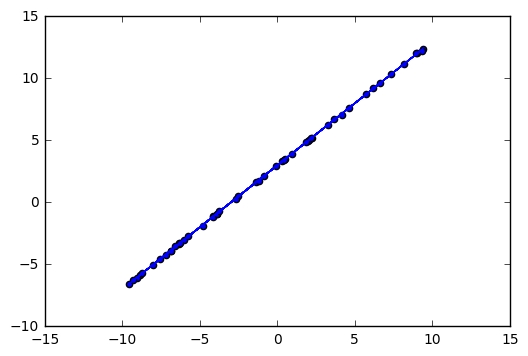

In [8]:
from numpy.random import normal
from scipy import stats as stats
import tensorflow as tf


f = lambda x: x + 3

np.random.seed(42)
Xs = np.random.uniform(-10, 10, 50)
Ys = f(Xs) + normal(0, 5e-2, len(Xs))
Xs, Ys = Xs.reshape(-1, 1), Ys.reshape(-1, 1)
n_samples = len(Xs)


X  = tf.placeholder(tf.float32, [None, 1])
Y_ = tf.placeholder(tf.float32, [None, 1])
a = tf.Variable(0.0)
b = tf.Variable(0.0)


Y = a*X + b
loss  = (1./(2*n_samples)) * (Y-Y_)**2 
#tf.reduce_sum(tf.pow(Y - Y_, 2))/(2*n_samples)


trainer = tf.train.GradientDescentOptimizer(0.01)
train_op = trainer.minimize(loss)
grads_and_vars = trainer.compute_gradients(loss, [a, b])
optimize = trainer.apply_gradients(grads_and_vars)
grads_and_vars = tf.Print(grads_and_vars, [grads_and_vars], 'Status:')

grad_a = (1/n_samples) * tf.matmul(Y-Y_,  X, transpose_a=True)
grad_b = (1/n_samples) * tf.reduce_sum(Y-Y_)


with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.scatter(Xs, Ys, marker='o')

    for i in range(1000):
        val_loss, val_grads, da, db = sess.run([loss, grads_and_vars, grad_a, grad_b], feed_dict={X: Xs, Y_: Ys})
        sess.run(train_op, feed_dict={X: Xs, Y_: Ys})
        val_a, val_b= sess.run([a, b], feed_dict={X: Xs, Y_: Ys})
        
        if i% 100 == 0: 
            print(val_a, val_b, val_loss.sum())
            print(val_grads)
            print(da, db)
            print()

    plt.plot(Xs, val_a*Xs + val_b, '-')

## 4. Logistička regresija u Tensorflowu

0	2.3847310543060303
100	0.48245367407798767
200	0.45760518312454224
300	0.43992212414741516
400	0.42718183994293213
500	0.4179280698299408
600	0.4111345410346985
700	0.40608882904052734
800	0.4022970199584961
900	0.39941537380218506
[[22  2  5]
 [ 0 31  0]
 [ 0  0 40]]
[0.28718054152175598, 0.65281514086530534, nan]


/home/marko/Projects/DU/DU1/data.py:152: RuntimeWarning: invalid value encountered in long_scalars
  return tp / (tp + fp)


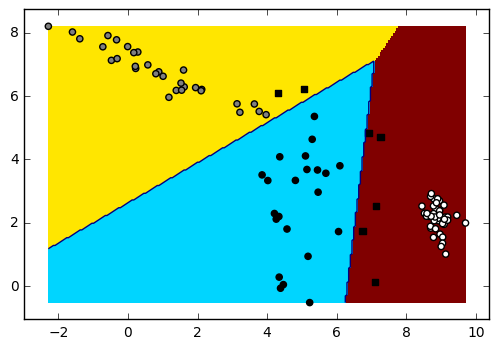

In [9]:
from tf_logreg import TFLogreg

tf.reset_default_graph() 
np.random.seed(100)
tf.set_random_seed(100)

C = 3
n = 100
X, Y_, Yoh_ = data.sample_gauss_2d(C, n, one_hot=True)


tflr = TFLogreg(X.shape[1], Yoh_.shape[1], 0.1, 0.25)
tflr.train(X, Yoh_, 1000)

probs = tflr.eval(X)
Y = probs.argmax(axis=1)
decfun = lambda x: tflr.eval(x).argmax(axis=1)


# eval
mat, classes = data.confusion_mat(y_pred=Y, y_true=Y_)
APs = data.eval_AP_multi(Y_=Y_, probs=probs)
print(mat)
print(APs)

# plot
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)
data.graph_data(X, Y_, Y)
plt.show()

0	9.681035995483398
100	0.3484222888946533
200	0.19662036001682281
300	0.1955685168504715
400	0.1401894986629486
500	0.11972405761480331
600	0.19484181702136993
700	0.11164046823978424
800	0.1048794761300087
900	0.2500140070915222
1000	0.09928923100233078
1100	0.09644889086484909
1200	0.09334670752286911
1300	0.09067846089601517
1400	0.08811535686254501
1500	0.08561614900827408
1600	0.0839420035481453
1700	0.084060437977314
1800	0.08104579150676727
1900	0.08564108610153198
2000	0.08016858994960785
2100	0.08025068789720535
2200	0.0792694017291069
2300	0.07828546315431595
2400	0.0764550194144249
2500	0.07514801621437073
2600	0.07221908867359161
2700	0.0755050927400589
2800	0.07767610996961594
2900	0.07349090278148651
3000	0.07383528351783752
3100	0.07151217013597488
3200	0.07023435086011887
3300	0.06916198134422302
3400	0.06523282080888748
3500	0.058398257941007614
3600	0.05536999553442001
3700	0.053070224821567535
3800	0.05216752365231514
3900	0.05063042789697647
4000	0.0496507249772548

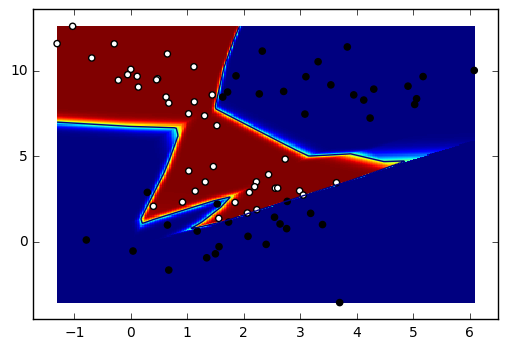

1.0 1.0 1.0
1.0


In [12]:
from tf_deep import TFDeep

tf.reset_default_graph()
np.random.seed(42)
tf.set_random_seed(100)


X,Y_, Yoh_ = data.sample_gmm_2d(K=4, C=2, N=20, one_hot=True)


config = [X.shape[1], 10, 10, Yoh_.shape[1]]
nn = TFDeep(config, 0.1)
nn.train(X, Yoh_, 10000)

dec_fun = lambda X: nn.eval(X)[:, 1] 
probs = dec_fun(X)

Y = probs > 0.5
bbox=(np.min(X, axis=0), np.max(X, axis=0))


data.graph_surface(dec_fun, bbox, offset=0.5)
data.graph_data(X, Y_, Y)
plt.show()


# report performance
accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
AP = data.eval_AP(Y_[probs.argsort()])
print (accuracy, recall, precision)
print(AP)

In [288]:
summary_writer = tf.train.SummaryWriter('/home/marko/Projects/DU/logs', nn.session.graph)


In [10]:
def count_params():
    total = 0
    for var in tf.trainable_variables():
        shape = var.get_shape()
        var_params = int(np.prod(shape))
        print('{}; shape: {}; total: {}'.format(var.name, shape, var_params))
        total += var_params
    print('Total:', total)

count_params()

Variable:0; shape: (3, 2); total: 6
Variable_1:0; shape: (3,); total: 3
Total: 9


0 [2, 2] relu
1 [2, 10, 2] relu
2 [2, 10, 10, 2] relu
3 [2, 2] sigmoid
4 [2, 10, 2] sigmoid
5 [2, 10, 10, 2] sigmoid


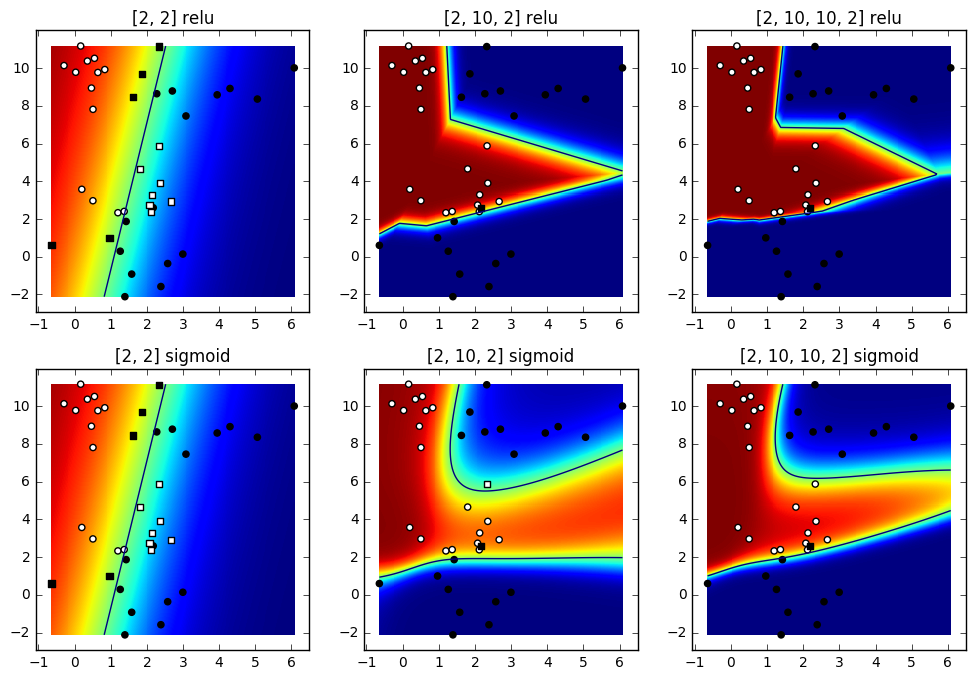

In [14]:
from itertools import product

def plt_problem(X, Y_, Y, decfun, title):
    plt.title(title)
    bbox=(np.min(X, axis=0), np.max(X, axis=0))
    data.graph_surface(decfun, bbox, offset=0.5)
    data.graph_data(X, Y_, Y)

def use_fixed_seed():
    tf.reset_default_graph()
    tf.set_random_seed(130)
    np.random.seed(42)
    
Ks = [4, 6]; Cs = [2, 2]; Ns = [40, 10]
Ks = [4]; Cs = [2]; Ns = [10]
confs = [[2,2], [2,10,2], [2, 10, 10, 2]]
activations = [tf.nn.relu, tf.nn.sigmoid]
params = [Ks,Cs,Ns,confs,activations]


plt.figure(figsize=(12,8))
for i, (activ, K, C, N, conf) in enumerate(product(activations,Ks,Cs,Ns,confs)):
    print(i, conf, activ.__name__)
    use_fixed_seed()

    X, Y_, Yoh_ = data.sample_gmm_2d(K, C, N, one_hot=True)
    

    nn = TFDeep(conf, 0.05, 1e-6, activ)
    nn.train(X, Yoh_, 4000, verbose=False)

    probs = nn.eval(X)
    Y = probs.argmax(axis=1)

    plt.subplot(2, 3, i+1)
    plt_problem(X, Y_, Y, lambda x: nn.eval(x)[:,1], '%s %s' % (conf, activ.__name__))


plt.show()



## SVM

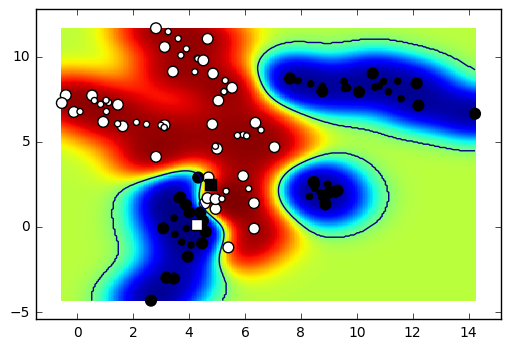

In [11]:
from ksvm_wrap import SVMWrapper

np.random.seed(100)

C = 2
n = 10
X, Y_, Yoh_ = data.sample_gmm_2d(6, 2, 20, one_hot=True)


model = SVMWrapper(X, Y_, c=1, g='auto')
decfun = lambda x: model.get_scores(x)[:,1]
probs = model.get_scores(X)
Y = probs.argmax(axis=1)


bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(decfun, bbox, offset=0.5)
data.graph_data(X, Y_, Y, model.support())
plt.show()


# MNIST

In [12]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

tf.app.flags.DEFINE_string('data_dir', '/tmp/data/', 'Directory for storing data')
mnist = input_data.read_data_sets(tf.app.flags.FLAGS.data_dir, one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


55000 784 10
(784,)


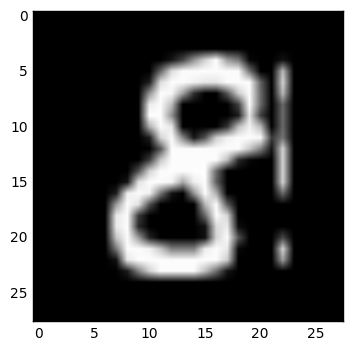

In [13]:
# examine data
N=mnist.train.images.shape[0]
D=mnist.train.images.shape[1]
C=mnist.train.labels.shape[1]
print(N, D, C)
print(mnist.train.images[0].shape)
plt.imshow(mnist.train.images[9].reshape(28,28), cmap='gray')

In [14]:
tf.reset_default_graph()
X, Yoh_ = mnist.train.images, mnist.train.labels

config = [X.shape[1], Yoh_.shape[1]]
nn = TFDeep(config, 0.5, 1e-8)
nn.train(X, Yoh_, 4000)

# dohvati vjerojatnosti na skupu za učenje



NameError: name 'TFDeep' is not defined

In [20]:
Ys = nn.eval(mnist.test.images)

In [21]:
(Ys.argmax(1) == mnist.test.labels.argmax(1)).sum()/len(Ys)

0.46589999999999998

In [15]:
def plt_problem(X, Y_, Y, decfun, title):
    plt.title(title)
    bbox=(np.min(X, axis=0), np.max(X, axis=0))
    data.graph_surface(decfun, bbox, offset=0.5)
    data.graph_data(X, Y_, Y)

def use_fixed_seed():
    tf.reset_default_graph()
    tf.set_random_seed(130)
    np.random.seed(42)

In [61]:

class TFDeep:
    def __init__(self, config, param_delta, param_lambda=1e-4, activation=tf.nn.relu):
        D = config[0]; C = config[-1]
        n_layers = len(config[1:])

        # data
        self.X  = tf.placeholder(tf.float32, [None, D])
        self.Yoh_ = tf.placeholder(tf.float32, [None, C])

        activations = [activation] * (n_layers-1) + [tf.nn.softmax]


        reg_loss = 0
        prev_out = self.X
        for i, (prev, next) in enumerate(zip(config, config[1:])):
            Ws = tf.Variable(tf.random_normal([next, prev]), name='W%s' % i)
            bs = tf.Variable(tf.random_normal([next]), name='b%s' % i)

            s = tf.add(tf.matmul(prev_out, Ws, transpose_b=True), bs)
            prev_out = activations[i](s)

            reg_loss += tf.nn.l2_loss(Ws)

        # output
        self.probs = prev_out
        err_loss = tf.reduce_mean(-tf.reduce_sum(self.Yoh_ * tf.log(self.probs), 1))
        self.loss = err_loss + param_lambda * reg_loss

        self.train_step = tf.train.GradientDescentOptimizer(param_delta).minimize(self.loss)
        self.session = tf.Session()



    def train(self, X, Yoh_, param_niter, verbose=True):
        self.session.run(tf.initialize_all_variables())
        data_dict = {self.X: X, self.Yoh_: Yoh_}

        for i in range(param_niter):
            start_time = time.time()
            val_loss, _ = self.session.run([self.loss, self.train_step], feed_dict=data_dict)
            duration = time.time() - start_time
            if verbose and i % 1 == 0: print("{}\t{}\t{}".format(i, val_loss, duration));

    def _shuffle(self, X, Yoh_):
        perm = np.random.permutation(len(X))
        return X[perm], Yoh_[perm]
        
    def _split_dataset(self, X, Yoh_, ratio=0.8):
        X, Yoh_ = self._shuffle(X, Yoh_)
        split = int(ratio * len(X))
        return X[:split], X[split:], Yoh_[:split], Yoh_[split:],
    
    def batch_train(self, X, Yoh_, n_epochs=1000, batch_size=50, train_ratio=1, print_step=100):
        self.session.run(tf.initialize_all_variables())
        prev_loss = window_loss = float('inf'); 
        
        X_train, X_val, Y_train, Y_val = self._split_dataset(X, Yoh_, ratio=train_ratio)
        n_samples = len(X_train)
        n_batches = int(n_samples/batch_size)
        
        for epoch in range(n_epochs):
            X_train, Y_train = self._shuffle(X_train, Y_train)
            i = 0; avg_loss = 0
            
            while i < n_samples:
                batch_X, batch_Yoh_ = X_train[i:i+batch_size], Y_train[i:i+batch_size]
                data_dict = {self.X: batch_X, self.Yoh_: batch_Yoh_}
                val_loss, _ = self.session.run([self.loss, self.train_step], feed_dict=data_dict)
                
                avg_loss += val_loss / n_batches
                i += batch_size
            
            # validation
            data_dict = {self.X: X_val, self.Yoh_: Y_val}
            val_loss, _ = self.session.run([self.loss, self.train_step], feed_dict=data_dict)
            window_loss = min(window_loss, val_loss)
            if epoch % 50 == 0:
                if window_loss > prev_loss:
                    print("Early stopping: epoch", epoch)
                    break
                prev_loss = window_loss
                window_loss = float('inf')
            
            if epoch % print_step == 0:
                print("Epoch: {:4d}; avg_train_loss {:.9f}; validation_loss {:.9f}".format(epoch, avg_loss, val_loss))
                
   
            prev_loss = val_loss
    
        print("Optimization Finished!")
        print("Validation loss {:.9f}".format(val_loss))
                
    def eval(self, X):
        probs =  self.session.run(self.probs, {self.X: X})
        return probs



In [62]:
tf.reset_default_graph()
X, Yoh_ = mnist.train.images, mnist.train.labels
Y = Yoh_.argmax(0)
confs = [[784, 10]]#, [784, 100, 10]]
params = [confs]


plt.figure(figsize=(12,8))
for i, conf in enumerate(confs):
    print(i, conf)
    use_fixed_seed()

    nn = TFDeep(conf, 0.1, 1e-4)
    with Timer(label='train', verbose=True):
        nn.batch_train(X, Yoh_, n_epochs=1000, batch_size=50, train_ratio=0.8)
        #nn.train(X, Yoh_, 1000)

    #probs = nn.eval(X)
    #Y = probs.argmax(axis=1)

    #plt.subplot(2, 3, i+1)
    #plt_problem(X, Y_, Y, lambda x: nn.eval(x)[:,1], '%s %s' % (conf, activ.__name__))

    
plt.show()


0 [784, 10]
Epoch:    0; avg_train_loss 2.484260730; validation_loss 1.445222378
Epoch:  100; avg_train_loss 0.305420488; validation_loss 0.350724846
Epoch:  200; avg_train_loss 0.267548376; validation_loss 0.313944668
Epoch:  300; avg_train_loss 0.261851873; validation_loss 0.310868591
train: elapsed time: 314.242878 s


KeyboardInterrupt: 

In [55]:
X = mnist.test.images
Y_ = mnist.test.labels.argmax(1)

probs = nn.eval(X)
Y = probs.argmax(axis=1)


from sklearn.metrics import accuracy_score
accuracy_score(Y, Y_)

0.91790000000000005

In [ ]:
n_epochs = 1000
batch_size = 50
n_samples = len(X)

for epoch in range(n_epochs):
    n_batches = int(n_samples/batch_size)
    perm = np.random.permutation(n_samples)
    X = X[perm]
    y = y[perm]
    
    i = 0; avg_cost = 0
    while i < n_samples:
        batch_xs, batch_ys = X[i:i+batch_size], y[i:i+batch_size]

        
        
        avg_cost += c / n_batches
        i += batch_size
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % epoch, "cost=", "{:.9f}".format(avg_cost))

print("Optimization Finished!")